## Exploring Stock Price Data

In [1]:
import pandas as pd


In [2]:
data_apple = pd.read_csv('../CSV/aapl.csv')
data_apple.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,108.77,109.69,108.36,109.36,25368072
1,18-Aug-16,109.23,109.60,109.02,109.08,21984703
2,17-Aug-16,109.10,109.37,108.34,109.22,25355976
3,16-Aug-16,109.63,110.23,109.21,109.38,33794448
4,15-Aug-16,108.14,109.54,108.08,109.48,25868209


In [3]:
col_name = data_apple.columns[0]
data_apple = data_apple.rename(columns = {col_name:'Date'})
data_apple.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,108.77,109.69,108.36,109.36,25368072
1,18-Aug-16,109.23,109.60,109.02,109.08,21984703
2,17-Aug-16,109.10,109.37,108.34,109.22,25355976
3,16-Aug-16,109.63,110.23,109.21,109.38,33794448
4,15-Aug-16,108.14,109.54,108.08,109.48,25868209


In [4]:
data_apple['Date'] = pd.to_datetime(data_apple['Date'])

In [5]:
data_apple.set_index('Date', inplace=True)
data_apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-19,108.77,109.69,108.36,109.36,25368072
2016-08-18,109.23,109.60,109.02,109.08,21984703
2016-08-17,109.10,109.37,108.34,109.22,25355976
2016-08-16,109.63,110.23,109.21,109.38,33794448
2016-08-15,108.14,109.54,108.08,109.48,25868209


In [6]:
data_apple['Year'] = data_apple.index.year
data_apple['Month'] = data_apple.index.month
data_apple.head()

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2016-08-19,108.77,109.69,108.36,109.36,25368072,2016,8
2016-08-18,109.23,109.60,109.02,109.08,21984703,2016,8
2016-08-17,109.10,109.37,108.34,109.22,25355976,2016,8
2016-08-16,109.63,110.23,109.21,109.38,33794448,2016,8
2016-08-15,108.14,109.54,108.08,109.48,25868209,2016,8


## Exploring the data

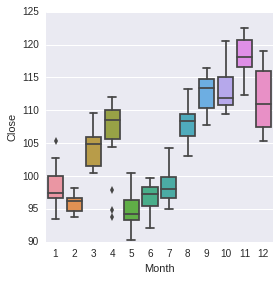

In [7]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Month',
    y='Close',
    data=data_apple, 
    kind='box'
)

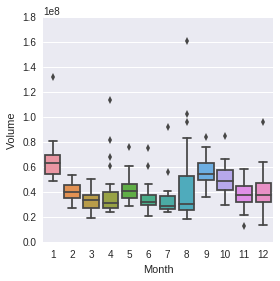

In [8]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Month',
    y='Volume',
    data=data_apple, 
    kind='box'
)

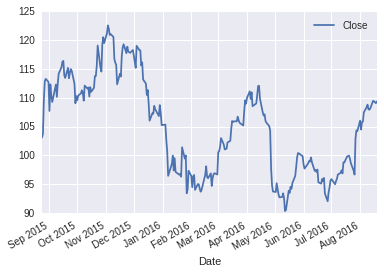

In [9]:
data_apple[['Close']].plot()

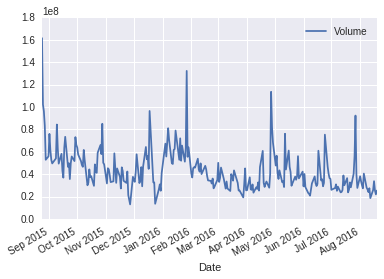

In [10]:
data_apple[['Volume']].plot()

## Autocorrelation

In [11]:
data_apple['Close'].resample('D').mean().autocorr(lag=7)

0.8981442503358853

In [12]:
data_apple['Close'].resample('D').mean().autocorr(lag=30)

0.44832364668956531

In [13]:
data_apple['Volume'].resample('D').mean().autocorr(lag=180)

-0.059221082430108297

In [14]:
data_apple['Volume'].resample('D').mean().autocorr(lag=360)

-0.99999999999999978

## Averaging

In [15]:
# Resample to have the monthly average 
monthly_mean_close = data_apple[['Close']].resample('M').mean()
monthly_mean_close

,Close
Date,
2015-08-31,109.253333
2015-09-30,112.797619
2015-10-31,113.360000
2015-11-30,118.162500
2015-12-31,111.726818
2016-01-31,98.428947
2016-02-29,95.746500
2016-03-31,104.267273
2016-04-30,106.739048


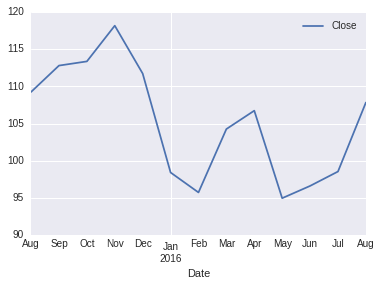

In [16]:
monthly_mean_close.plot()

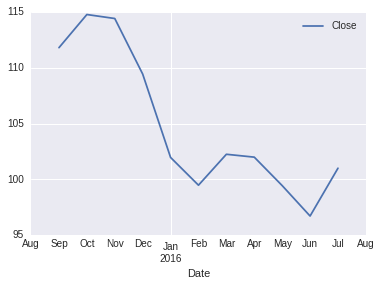

In [17]:
monthly_mean_close.rolling(window=3,center=True).mean().plot()

In [18]:
data_baidu = pd.read_csv('../CSV/bidu.csv', skipinitialspace=True, low_memory=False)
data_baidu.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,175.26,178.88,174.86,177.53,2906705
1,18-Aug-16,173.03,175.80,172.68,175.40,2535554
2,17-Aug-16,173.98,174.00,172.01,172.73,2426920
3,16-Aug-16,173.00,174.42,170.90,173.30,2642183
4,15-Aug-16,169.22,174.96,169.00,172.95,3448610


In [19]:
data_baidu.set_index('Date', inplace=True)
data_baidu.head()

,Open,High,Low,Close,Volume
Date,,,,,
19-Aug-16,175.26,178.88,174.86,177.53,2906705
18-Aug-16,173.03,175.80,172.68,175.40,2535554
17-Aug-16,173.98,174.00,172.01,172.73,2426920
16-Aug-16,173.00,174.42,170.90,173.30,2642183
15-Aug-16,169.22,174.96,169.00,172.95,3448610


In [22]:
data_google = pd.read_csv('../CSV/goog.csv', skipinitialspace=True, low_memory=False)
data_google.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,775.00,777.10,773.13,775.42,861546
1,18-Aug-16,780.01,782.86,777.00,777.50,719429
2,17-Aug-16,777.32,780.81,773.53,779.91,924226
3,16-Aug-16,780.30,780.98,773.44,777.14,1028047
4,15-Aug-16,783.75,787.49,780.11,782.44,938186


In [23]:
data_google.set_index('Date', inplace=True)
data_google.head()

,Open,High,Low,Close,Volume
Date,,,,,
19-Aug-16,775.00,777.10,773.13,775.42,861546
18-Aug-16,780.01,782.86,777.00,777.50,719429
17-Aug-16,777.32,780.81,773.53,779.91,924226
16-Aug-16,780.30,780.98,773.44,777.14,1028047
15-Aug-16,783.75,787.49,780.11,782.44,938186


In [24]:
data_ibm = pd.read_csv('../CSV/ibm.csv', skipinitialspace=True, low_memory=False)
data_ibm.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,160.84,160.91,159.52,160.04,2815184
1,18-Aug-16,160.89,162.00,160.44,161.36,3652013
2,17-Aug-16,160.97,161.16,159.84,160.44,3225919
3,16-Aug-16,161.11,161.93,160.69,160.70,2210229
4,15-Aug-16,162.40,162.97,161.78,161.88,2970415


In [25]:
data_ibm.set_index('Date', inplace=True)
data_ibm.head()

,Open,High,Low,Close,Volume
Date,,,,,
19-Aug-16,160.84,160.91,159.52,160.04,2815184
18-Aug-16,160.89,162.00,160.44,161.36,3652013
17-Aug-16,160.97,161.16,159.84,160.44,3225919
16-Aug-16,161.11,161.93,160.69,160.70,2210229
15-Aug-16,162.40,162.97,161.78,161.88,2970415


In [26]:
data_yahoo = pd.read_csv('../CSV/yhoo.csv', skipinitialspace=True, low_memory=False)
data_yahoo.head()

,Date,Open,High,Low,Close,Volume
0,19-Aug-16,42.80,43.12,42.64,43.02,9460753
1,18-Aug-16,42.69,42.97,42.58,42.90,11294419
2,17-Aug-16,42.39,42.75,42.39,42.70,8571927
3,16-Aug-16,42.30,42.79,41.95,42.49,13793794
4,15-Aug-16,43.18,43.29,42.43,42.67,14441784


In [27]:
data_yahoo.set_index('Date', inplace=True)
data_yahoo.head()

,Open,High,Low,Close,Volume
Date,,,,,
19-Aug-16,42.80,43.12,42.64,43.02,9460753
18-Aug-16,42.69,42.97,42.58,42.90,11294419
17-Aug-16,42.39,42.75,42.39,42.70,8571927
16-Aug-16,42.30,42.79,41.95,42.49,13793794
15-Aug-16,43.18,43.29,42.43,42.67,14441784
